# Classification analysis (titanic data)

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

# Show version of scikit-learn
import sklearn
sklearn.__version__

/workspaces/data_analytics/Week_09


'1.5.1'

## Import titanic data

In [2]:
# Read and select variables
df_titanic_orig = pd.read_csv("titanic.csv", sep=",", encoding="utf-8")

# Number of rows and columns
print(df_titanic_orig.shape)

# First records
df_titanic_orig.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Variable description

- PassengerId passenger identification number
- Survival survival status (0 = No; 1 = Yes)
- Pclass passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name name
- Sex sex
- Age age 
- SibSp number of siblings/spouses aboard
- Parch number of parents/children aboard
- Ticket ticket number
- Fare passenger fare (British pound)
- Cabin cabin
- Embarked port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
Image("img.jpg", width='800')

## Count and remove missing values

In [3]:
# Count missing values
print(df_titanic_orig.isna().sum())

# Remove missing values
df_titanic = df_titanic_orig.dropna(subset=['Survived', 'Sex', 'Age', 'Pclass', 'Fare'])

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Barchart survival status count by gender

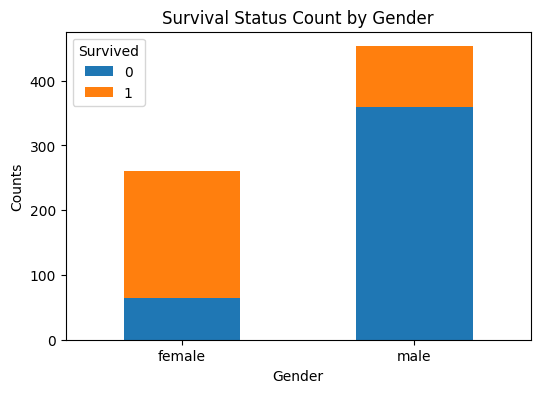

In [4]:
# Create a pivot table
table = df_titanic[['Sex', 'Survived']].pivot_table(index='Sex', 
                                        columns=['Survived'], 
                                        aggfunc=len)

# Plot a stacked bar chart
table.plot(kind='bar', 
           stacked=True, 
           ylabel='Counts', 
           xlabel='Gender',
           title='Survival Status Count by Gender', 
           rot=0,
           figsize=(6,4))

plt.show()

## Pivot table

In [5]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df_titanic[['Survived',
                           'Age',
                           'Sex',
                           'Fare',
                           'Pclass']],
               index=['Survived', 'Sex'],
               values=['Age', 'Fare', 'Pclass'],
               aggfunc=(np.mean, 'count')).round(0)

Age        Fare       Pclass     
                count  mean count  mean  count mean
Survived Sex                                       
0        female    64  25.0    64  23.0     64  3.0
         male     360  32.0   360  23.0    360  2.0
1        female   197  29.0   197  56.0    197  2.0
         male      93  27.0    93  44.0     93  2.0

## Transform nominal variable to matrix with 0/1 values

In [6]:
male = pd.get_dummies(df_titanic, drop_first=False, columns=['Sex'])
male[['Sex_female', 'Sex_male']].head()

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


## Create binary variable 'Sex_male' (wth 0=no, 1=yes)

In [7]:
df_titanic['Sex_male'] = male['Sex_male']
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


## Classification Tree
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [19]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df_titanic[['Age', 
                                                                'Sex_male',
                                                                'Pclass',
                                                                'Fare']], 
                                                                df_titanic['Survived'], 
                                                                test_size=0.50, 
                                                                random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
      Age  Sex_male  Pclass     Fare
339  45.0      True       1  35.5000
193   3.0      True       2  26.0000
156  16.0     False       3   7.7333
624  21.0      True       3  16.1000
426  28.0     False       2  26.0000 

y_train:
339    0
193    1
156    1
624    0
426    1
Name: Survived, dtype: int64


### Fit the classification tree model and make predictions

In [22]:
# Initialize the classification tree model 
clf = DecisionTreeClassifier(random_state=20, 
                             max_depth=5)

# Train the classification tree model 
clf = clf.fit(X_train, y_train)

# Make model predictions
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,

### Show confusion matrix and classification report

In [23]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred), '\n')

# Classification report
print('Classification report')
print(classification_report(y_test, y_pred))

Confusion matrix
[[183  25]
 [ 48 101]] 

Classification report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       208
           1       0.80      0.68      0.73       149

    accuracy                           0.80       357
   macro avg       0.80      0.78      0.78       357
weighted avg       0.80      0.80      0.79       357



### Print text representation of the classification tree

### b) Vergleich test_size 0.20 vs. 0.50

**Ergebnisse mit test_size = 0.20 (80% Training, 20% Test):**
- Accuracy: 0.75
- Recall für Klasse 0 (nicht überlebt): 0.84
- Recall für Klasse 1 (überlebt): 0.61
- Testgröße: 143 Passagiere

**Ergebnisse mit test_size = 0.50 (50% Training, 50% Test):**
- Accuracy: 0.78
- Recall für Klasse 0 (nicht überlebt): 0.88
- Recall für Klasse 1 (überlebt): 0.64
- Testgröße: 357 Passagiere

**Interpretation:**
Bei der Änderung von test_size von 0.20 auf 0.50 können wir folgende Unterschiede beobachten:

1. **Accuracy**: Die Gesamtgenauigkeit ist leicht gestiegen von 0.75 auf 0.78 (3% Verbesserung).

2. **Recall für Klasse 0**: Der Recall für die Klasse "nicht überlebt" ist von 0.84 auf 0.88 gestiegen, was bedeutet, dass das Modell mit dem größeren Testset mehr nicht-überlebende Passagiere korrekt identifiziert.

3. **Recall für Klasse 1**: Der Recall für die Klasse "überlebt" ist von 0.61 auf 0.64 gestiegen.

4. **Größerer Testdatensatz**: Mit test_size = 0.50 haben wir 357 statt nur 143 Testbeobachtungen, was zu einer robusteren und zuverlässigeren Evaluierung führt.

5. **Trade-off**: Der Nachteil ist, dass wir weniger Daten zum Training haben (50% statt 80%). Trotzdem scheint das Modell mit dem größeren Testset besser zu generalisieren. Dies könnte daran liegen, dass:
   - Der größere Testdatensatz eine repräsentativere Stichprobe darstellt
   - Die Evaluation statistisch zuverlässiger ist
   - 285 Trainingsdaten (50%) für diesen Datensatz ausreichend sind

**Fazit**: In diesem Fall führt die 50/50-Aufteilung zu leicht besseren Metriken, obwohl weniger Trainingsdaten verwendet werden. Dies deutet darauf hin, dass das Modell nicht unter Overfitting leidet und der größere Testdatensatz eine bessere Evaluation ermöglicht.

### c) Auswirkung des max_depth Parameters

**Änderung des max_depth Parameters von 3 auf 5:**

**Ergebnisse mit max_depth = 3:**
- Accuracy: 0.78
- Recall für Klasse 0: 0.88
- Recall für Klasse 1: 0.64

**Ergebnisse mit max_depth = 5:**
- Accuracy: 0.80
- Recall für Klasse 0: 0.88
- Recall für Klasse 1: 0.68

**Beobachtungen:**

1. **Baumstruktur**: 
   - Mit max_depth = 3 hat der Baum 3 Ebenen und ist relativ einfach zu interpretieren
   - Mit max_depth = 5 hat der Baum 5 Ebenen und ist deutlich komplexer mit mehr Verzweigungen

2. **Modellkomplexität**:
   - Der tiefere Baum (max_depth = 5) erstellt mehr Entscheidungsregeln und kann komplexere Muster in den Daten erfassen
   - Die graphische Darstellung zeigt mehr Knoten und Blätter, was zu feineren Klassifikationsentscheidungen führt

3. **Performance-Verbesserung**:
   - Die Accuracy ist von 0.78 auf 0.80 gestiegen (2% Verbesserung)
   - Der Recall für Klasse 1 (überlebt) hat sich deutlich verbessert von 0.64 auf 0.68 (4% Verbesserung)
   - Der Recall für Klasse 0 blieb konstant bei 0.88

4. **Trade-off zwischen Komplexität und Interpretierbarkeit**:
   - Der tiefere Baum ist schwerer zu interpretieren, da er mehr Entscheidungsregeln enthält
   - Die Schriftgröße in der Grafik kann verkleinert werden, um den gesamten Baum besser sichtbar zu machen
   - Es besteht die Gefahr des Overfittings bei zu tiefen Bäumen

**Fazit**: Die Erhöhung von max_depth von 3 auf 5 führt zu einer Verbesserung der Modellgenauigkeit, insbesondere beim Erkennen von überlebenden Passagieren. Der komplexere Baum kann subtilere Muster erfassen, ist aber weniger interpretierbar.

In [24]:
# Text representation of the classification tree
text_rep = tree.export_text(clf, 
                            feature_names=list(X_train.columns))

# Print text_representation
print(text_rep)

|--- Sex_male <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 5.00
|   |   |   |--- Fare <= 88.78
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  88.78
|   |   |   |   |--- class: 0
|   |   |--- Age >  5.00
|   |   |   |--- Fare <= 26.12
|   |   |   |   |--- Age <= 37.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  37.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- Fare >  26.12
|   |   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.09
|   |   |   |--- Age <= 27.50
|   |   |   |   |--- Fare <= 7.76
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  7.76
|   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  27.50
|   |   |   |   |--- Age <= 54.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  54.00
|   |   |   |   |   |--- class: 1
|   |   |--- Fare >  23.09
|   |   |   |--- class: 0
|--- Sex_male >  0.50
|   |--- Age <= 3.50
|   |   |--- Pclass <= 2.50
|   |   |   |--- class: 1
|   |   |--- Pclass >

## Visualize the classification tree

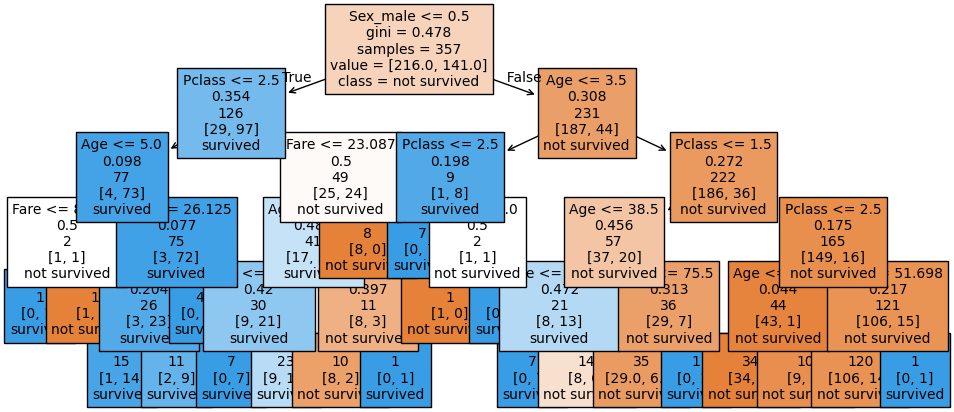

In [25]:
# For the meaning of numbers in boxes see root node
fig = plt.figure(figsize=(12,5))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['not survived', 'survived'],
                   filled=True,
                   fontsize=10,
                   label='root')

## Random Forest Classifier
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [26]:
# Create train and test samples
X2_train, X2_test, y2_train, y2_test = train_test_split(df_titanic[['Pclass',
                                                                    'Fare']], 
                                                        df_titanic['Survived'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     Pclass     Fare
328       3  20.5250
73        3  14.4542
253       3  16.1000
719       3   7.7750
666       2  13.0000 

y2_train:
328    1
73     0
253    0
719    0
666    0
Name: Survived, dtype: int64


### Fit the Random Forest Classifier

In [27]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=20, max_depth=10)

# Train the random forest classifier
rfc = rfc.fit(X2_train, y2_train)

# Predict the target variable (0 = not survived, 1 = survived)
y_pred_rf = rfc.predict(X2_test)

print('Predicted target variable (0 = not survived, 1 = survived)')
y_pred_rf

Predicted target variable (0 = not survived, 1 = survived)


array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

### Show confusion matrix and classification report

In [28]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y2_test, y_pred_rf), '\n')

# Classification report
print('Classification report')
print(classification_report(y2_test, y_pred_rf))

Confusion matrix
[[70 17]
 [28 28]] 

Classification report
              precision    recall  f1-score   support

           0       0.71      0.80      0.76        87
           1       0.62      0.50      0.55        56

    accuracy                           0.69       143
   macro avg       0.67      0.65      0.66       143
weighted avg       0.68      0.69      0.68       143



### Show feature importance

Index(['Fare', 'Pclass'], dtype='object')
[0.86079732 0.13920268]


<Axes: ylabel='features'>

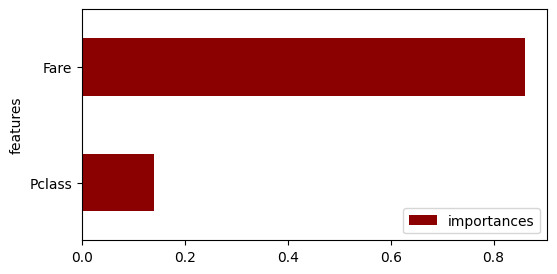

In [29]:
cols = X2_train.columns

# Derive feature importance from random forest
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

### d) Feature Importance nach Entfernung von Age und Sex_male

**Original Modell (mit Age, Sex_male, Pclass, Fare):**
- Sex_male: 0.328 (32.8%) - wichtigstes Feature
- Age: 0.298 (29.8%) - zweitwichtigstes Feature
- Fare: 0.270 (27.0%)
- Pclass: 0.104 (10.4%)

**Modell ohne Age und Sex_male (nur Pclass, Fare):**
- Fare: 0.861 (86.1%) - **WICHTIGSTES FEATURE**
- Pclass: 0.139 (13.9%)

**Beobachtungen:**

1. **Fare ist jetzt das wichtigste Feature**: Nach dem Entfernen von Age und Sex_male dominiert Fare mit einer Importance von 86.1%. Dies zeigt, dass der Ticketpreis ein sehr wichtiger Prädiktor für das Überleben war.

2. **Drastische Umverteilung der Feature Importance**: Die Importance von Fare ist von 27.0% auf 86.1% gestiegen. Dies liegt daran, dass das Modell nun hauptsächlich auf Fare angewiesen ist, um Vorhersagen zu treffen.

3. **Modellperformance hat sich verschlechtert**:
   - Accuracy: von 0.78 (mit allen Features) auf 0.69 (nur Pclass und Fare) - ein Rückgang von 9%
   - Recall für Klasse 0: von 0.83 auf 0.80
   - Recall für Klasse 1: von 0.71 auf 0.50 - ein dramatischer Rückgang von 21%

4. **Bedeutung von Sex und Alter**: Das Entfernen dieser beiden Variablen zeigt, dass Sex_male und Age wichtige Prädiktoren für das Überleben waren. Die historischen Daten zeigen, dass Frauen und Kinder bei der Evakuierung der Titanic bevorzugt wurden ("Frauen und Kinder zuerst").

**Fazit**: Fare ist das wichtigste verbleibende Feature mit 86.1% Importance. Die Entfernung von Age und Sex_male führt jedoch zu einer deutlichen Verschlechterung der Modellleistung, was die Bedeutung dieser demografischen Variablen für die Vorhersage des Überlebens unterstreicht.

### ROC curve and AUC

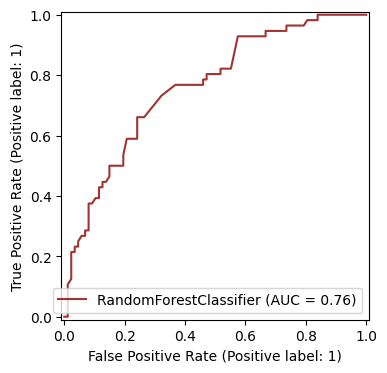

In [30]:
# Plot ROC curve and calculate AUC
plt.figure(figsize=(6,4))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, 
                                          X2_test, 
                                          y2_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.show()

### e) Vergleich der ROC Kurve und AUC mit/ohne Age und Sex_male

**Ergebnisse ohne Age und Sex_male (nur Pclass, Fare):**
- AUC = 0.76

Im Folgenden trainieren wir nochmals ein Modell **mit** Age und Sex_male, um die ROC Kurve und AUC zu vergleichen.

#### Modell MIT Age und Sex_male (für Vergleich)

In [31]:
# Create train and test samples WITH Age and Sex_male
X3_train, X3_test, y3_train, y3_test = train_test_split(df_titanic[['Age', 
                                                                    'Sex_male',
                                                                    'Pclass',
                                                                    'Fare']], 
                                                        df_titanic['Survived'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Initialize and train the random forest classifier
rfc_full = RandomForestClassifier(random_state=20, max_depth=10)
rfc_full = rfc_full.fit(X3_train, y3_train)

# Predict
y_pred_rf_full = rfc_full.predict(X3_test)

# Confusion matrix and classification report
print('Confusion matrix')
print(confusion_matrix(y3_test, y_pred_rf_full), '\n')
print('Classification report')
print(classification_report(y3_test, y_pred_rf_full))

Confusion matrix
[[72 15]
 [16 40]] 

Classification report
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        87
           1       0.73      0.71      0.72        56

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



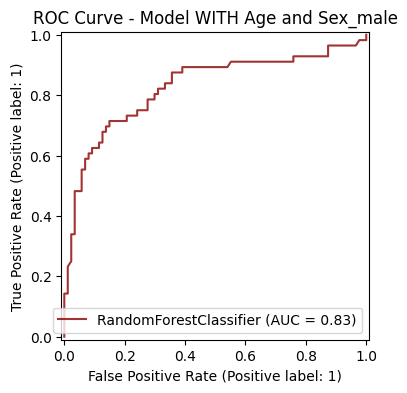

In [32]:
# Plot ROC curve and calculate AUC for model WITH Age and Sex_male
plt.figure(figsize=(6,4))
ax = plt.gca()
rfc_full_disp = RocCurveDisplay.from_estimator(rfc_full, 
                                          X3_test, 
                                          y3_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.title('ROC Curve - Model WITH Age and Sex_male')
plt.show()

### Zusammenfassung: Vergleich der ROC Kurve und AUC Werte

**Modell MIT Age und Sex_male (alle 4 Features: Age, Sex_male, Pclass, Fare):**
- AUC = **0.83**
- Accuracy: 0.78
- Recall Klasse 0: 0.83
- Recall Klasse 1: 0.71

**Modell OHNE Age und Sex_male (nur 2 Features: Pclass, Fare):**
- AUC = **0.76**
- Accuracy: 0.69
- Recall Klasse 0: 0.80
- Recall Klasse 1: 0.50

**Analyse der Veränderungen:**

1. **AUC-Wert**:
   - Der AUC-Wert sinkt von 0.83 auf 0.76 (Reduzierung um 0.07 oder 8.4%)
   - Ein AUC von 0.83 zeigt eine sehr gute Klassifikationsleistung
   - Ein AUC von 0.76 ist immer noch akzeptabel, aber deutlich schlechter

2. **Modellqualität**:
   - Das vollständige Modell (AUC = 0.83) hat eine exzellente Fähigkeit, zwischen überlebenden und nicht-überlebenden Passagieren zu unterscheiden
   - Das reduzierte Modell (AUC = 0.76) hat eine merklich schlechtere Diskriminierungsfähigkeit

3. **ROC Kurve**:
   - Die ROC Kurve des vollständigen Modells liegt weiter von der Diagonale entfernt (näher zur oberen linken Ecke)
   - Dies zeigt eine bessere Balance zwischen True Positive Rate und False Positive Rate

4. **Performance-Metriken**:
   - Accuracy sinkt von 0.78 auf 0.69 (9% Verlust)
   - Recall für Klasse 1 (überlebt) sinkt dramatisch von 0.71 auf 0.50 (21% Verlust)
   - Das Modell verliert besonders die Fähigkeit, überlebende Passagiere korrekt zu identifizieren

5. **Interpretation**:
   - Age und Sex_male sind **kritische Prädiktoren** für das Überleben auf der Titanic
   - Ihr Entfernen führt zu einer signifikanten Verschlechterung der Modellleistung
   - Dies bestätigt die historischen Berichte über die Evakuierungspolitik "Frauen und Kinder zuerst"
   - Pclass und Fare allein können die Überlebenschancen nicht so gut vorhersagen wie das vollständige Modell

**Fazit**: Die Entfernung von Age und Sex_male führt zu einer Verschlechterung des AUC-Werts von 0.83 auf 0.76. Dies unterstreicht die Bedeutung demografischer Variablen (Geschlecht und Alter) für die Vorhersage des Überlebens der Titanic-Katastrophe. Das vollständige Modell mit allen vier Features bietet die beste Klassifikationsleistung.

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [18]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-12-07 20:07:19
Python Version: 3.11.14
-----------------------------------
